# Gradient Descent

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns


In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

We will import for you the following dataset of ingredients with their mineral content

In [64]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/gradient_descent_ingredients_zinc_phosphorous.csv")
data.head()


,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

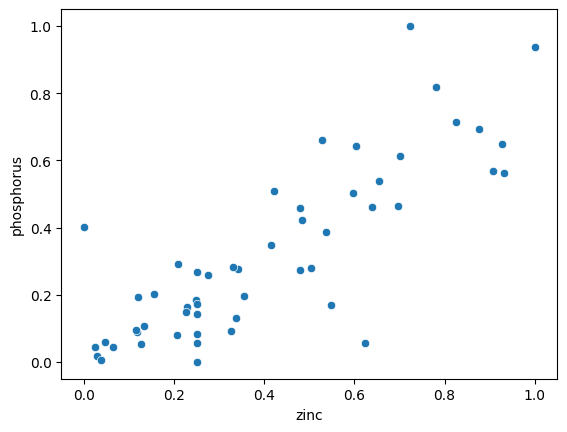

In [65]:
sns.scatterplot(data=data, x='zinc', y='phosphorus');


❓ Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

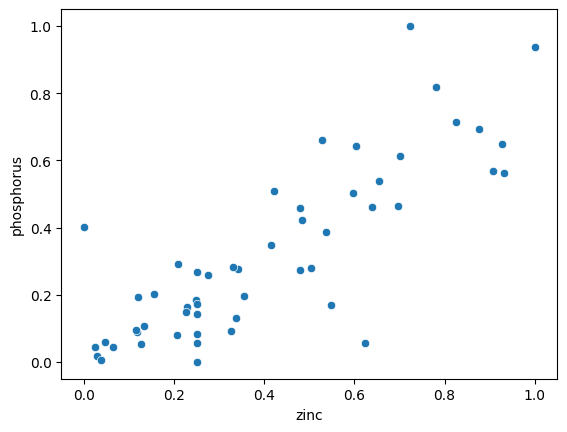

In [66]:
data_X = np.array(data['zinc'])
data_Y = np.array(data['phosphorus'])

sns.scatterplot(data=data, x='zinc', y='phosphorus');


In [67]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))


## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

❓ Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [68]:
def h(X, a, b):
    return a * X + b


### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Define the SSR Loss Function for the Hypothesis Function using the equation above. Reuse the function `h` coded above when writing your new function.


In [69]:
import numpy as np

def loss(X,Y,a,b):
    predicted_values = h(X, a, b)

    sum_squares_loss = np.sum((Y - predicted_values)**2)

    return sum_squares_loss


❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [70]:
data_X = np.array(data['zinc'])
data_Y = np.array(data['phosphorus'])

a = 1
b = 1

total_loss = loss(data_X, data_Y, a, b)

print("total loss", total_loss)


total loss 63.868506986115456


⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given point.


<details>
<summary>💡 Hint</summary>
Again, you must re-use the Hypothesis Function in your new function to compute the predictions at given points.
</details>

In [71]:
def gradient(X,Y,a,b):
    predicted_values = h(X, a, b)

    d_a = np.sum(-2 * X * (Y - predicted_values))
    d_b = np.sum(-2 * (Y - predicted_values))

    return d_a, d_b


❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [72]:
a = 1
b = 1

d_a, d_b = gradient(data_X, data_Y, a, b)

print("partial derivative with respect to a", d_a)
print("partial derivative with respect to b", d_b)


partial derivative with respect to a 48.459065809109006
partial derivative with respect to b 115.17923733301406


⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

❓ Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a `learning_rate` equal to `0.01` by default

In [73]:
def steps(d_a, d_b, learning_rate=0.01):
    step_a = learning_rate * d_a
    step_b = learning_rate * d_b

    return step_a, step_b


❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [74]:
a = 1
b = 1

d_a, d_b = gradient(data_X, data_Y, a, b)

step_a, step_b = steps(d_a, d_b)

print("step size for a", step_a)
print("step size for b", step_b)


step size for a 0.4845906580910901
step size for b 1.1517923733301405


⚠️ The steps should be 0.48 for `a` and 1.15 for `b`

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

❓ Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [75]:
def update_params(a, b, step_a, step_b):
    a_new = a - step_a
    b_new = b - step_b

    return a_new, b_new


### 2.6 One full epoch

❓ Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [76]:
a = 1
b = 1
learning_rate = 0.01

d_a, d_b = gradient(data_X, data_Y, a, b)

step_a, step_b = steps(d_a, d_b, learning_rate)

a_new, b_new = update_params(a, b, step_a, step_b)

print("updated values of a after the first epoch", a_new)
print("updated values of b after the first epoch", b_new)


updated values of a after the first epoch 0.5154093419089099
updated values of b after the first epoch -0.1517923733301405


⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

❓ Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the values for `loss`, `a`, and `b` at each epoch to their corresponding lists called `loss_history`, `a_history` and `b_history`

In [77]:
a = 1
b = 1
learning_rate = 0.01
epochs = 100

loss_history = []
a_history = []
b_history = []

for epoch in range(epochs):
    d_a, d_b = gradient(data_X, data_Y, a, b)


    step_a, step_b = steps(d_a, d_b, learning_rate)

    a -= step_a
    b -= step_b

    current_loss = loss(data_X, data_Y, a, b)
    loss_history.append(current_loss)

    a_history.append(a)
    b_history.append(b)

print("final values of a", a)
print("final values of b", b)


final values of a 0.768671510620374
final values of b 0.00708932115622393


❓ What are the parameter values at the end of the 100 epochs? Save them to respective variables `a_100` and `b_100` 

In [78]:
a_100 = a
b_100 = b

print("final values of a_100:", a_100)
print("final values of b_100:", b_100)


final values of a_100: 0.768671510620374
final values of b_100: 0.00708932115622393


In [79]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/reecepalmer/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/reecepalmer/Code/RPalmr/05-ML/04-Under-the-hood/data-batch-gradient-descent/tests
plugins: asyncio-0.19.0, dash-2.14.0, typeguard-2.13.3, anyio-3.6.2, hydra-core-1.3.2
asyncio: mode=strict
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Visual check

❓ Wrap this iterative approach into a method `gradient_descent()` which returns your `new_a`, `new_b` and `history`, a dictionary containing these lists: 
- `loss_history`
- `a_history`
- `b_history`

In [80]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    a = a_init
    b = b_init

    loss_history = []
    a_history = []
    b_history = []

    for epoch in range(n_epochs):
        d_a, d_b = gradient(X, Y, a, b)

        step_a, step_b = steps(d_a, d_b, learning_rate)

        # Update parameters
        a, b = update_params(a, b, step_a, step_b)

        current_loss = loss(X, Y, a, b)
        loss_history.append(current_loss)

        a_history.append(a)
        b_history.append(b)

    history = {
        'loss_history': loss_history,
        'a_history': a_history,
        'b_history': b_history
    }

    return a, b, history


❓ Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

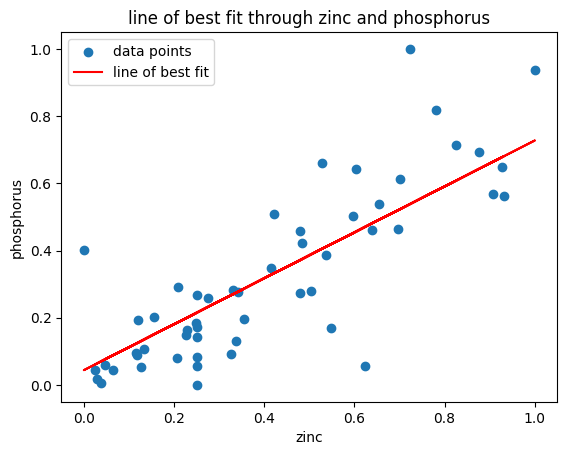

In [83]:
import matplotlib.pyplot as plt

final_a, final_b, history = gradient_descent(data_X, data_Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100)

plt.scatter(data_X, data_Y, label='data points')

plt.plot(data_X, h(data_X, final_a, final_b), color='red', label='line of best fit')

plt.xlabel('zinc')
plt.ylabel('phosphorus')
plt.title('line of best fit through zinc and phosphorus')

plt.legend()

plt.show()


## 5. Visualize your descent

🎯 Our goal is to plot our loss function and the descent steps on a 2D surface using matplotlib [contourf]

❓ Start by creating the data we need for the plot
- `range_a`: a range of 100 values for `a` equally spaced between -1 and 1
- `range_b`: a range of 100 values for `b` equally spaced between -1 and 1 
- `Z`: a 2D-array where each element `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [84]:
import numpy as np

range_a = np.linspace(-1, 1, 100)
range_b = np.linspace(-1, 1, 100)

A, B = np.meshgrid(range_a, range_b)

Z = np.zeros_like(A)

for i in range(len(range_a)):
    for j in range(len(range_b)):
        Z[j, i] = loss(data_X, data_Y, A[j, i], B[j, i])


In [ ]:
# YOUR CODE HERE


❓ Now, plot in one single subplot:
- your gradient as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with 3 parameters
- all historical (a,b) points as a scatterplot with red dots to visualize your gradient descent!

Change your learning rate and observe its impact on the graph!

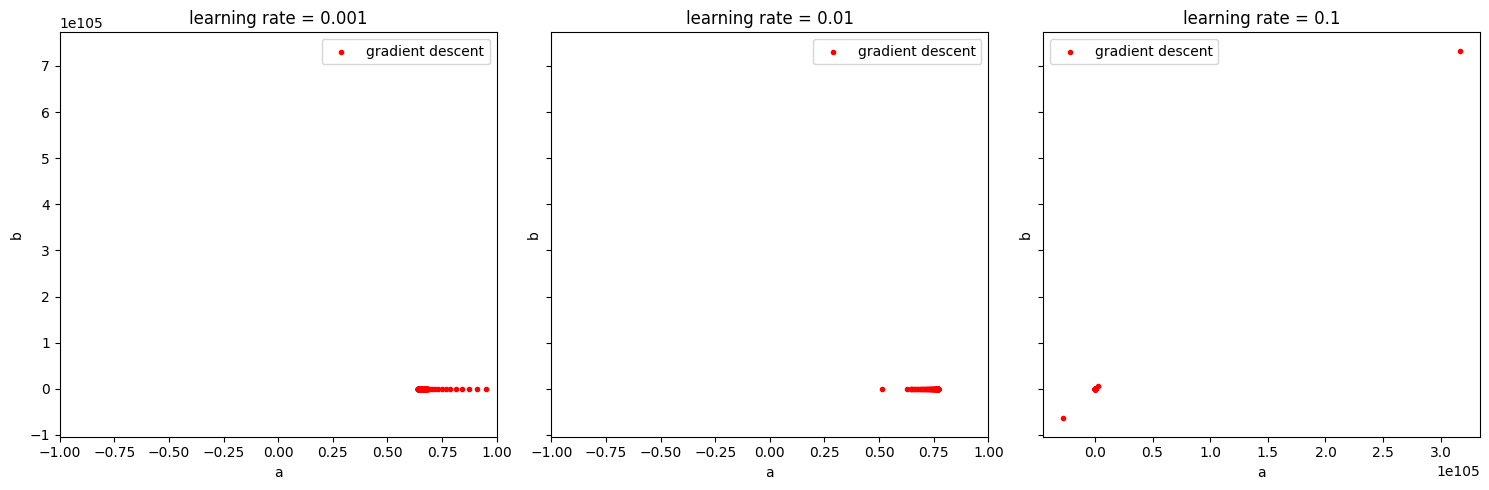

In [86]:
import matplotlib.pyplot as plt

def compute_loss_surface(X, Y, range_a, range_b):
    A, B = np.meshgrid(range_a, range_b)
    Z = np.zeros_like(A)
    for i in range(len(range_a)):
        for j in range(len(range_b)):
            Z[j, i] = loss(X, Y, A[j, i], B[j, i])
    return A, B, Z

learning_rates = [0.001, 0.01, 0.1]

fig, axes = plt.subplots(1, len(learning_rates), figsize=(15, 5), sharey=True)

for i, learning_rate in enumerate(learning_rates):
    final_a, final_b, history = gradient_descent(data_X, data_Y, a_init=1, b_init=1, learning_rate=learning_rate, n_epochs=100)

    A, B, Z = compute_loss_surface(data_X, data_Y, range_a, range_b)

    axes[i].contourf(A, B, Z, cmap='viridis', levels=20)

    axes[i].scatter(history['a_history'], history['b_history'], color='red', label='gradient descent', marker='.')

    axes[i].set_xlabel('a')
    axes[i].set_ylabel('b')
    axes[i].set_title(f'learning rate = {learning_rate}')

    axes[i].legend()

plt.tight_layout()
plt.show()


❓ [optional] What about 3D? Try to plot the same data on a [plot.ly 3D contour plot](https://plotly.com/python/3d-surface-plots/) below

In [88]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z, colorscale='Viridis')

scatter = go.Scatter3d(x=history['a_history'], y=history['b_history'], z=history['loss_history'], mode='markers',
                      marker=dict(color='red', size=5), name='gradient descent')

layout = go.Layout(scene=dict(xaxis=dict(title='a'), yaxis=dict(title='b'), zaxis=dict(title='Loss')))

fig = go.Figure(data=[surface, scatter], layout=layout)

fig.show()


❓ Plot the history of the `loss` values as a function of the number of `epochs`. Try with multiple variations of `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

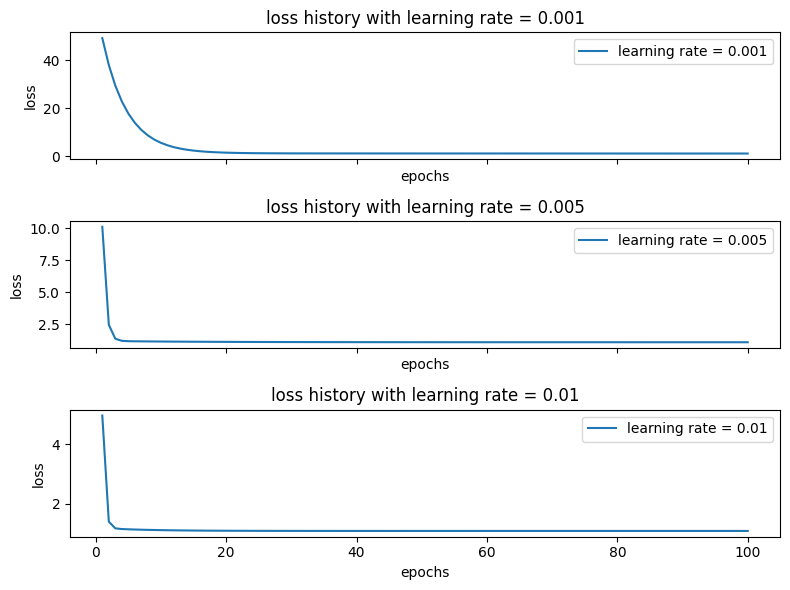

In [89]:
learning_rates = [0.001, 0.005, 0.01]

fig, axes = plt.subplots(len(learning_rates), 1, figsize=(8, 6), sharex=True)

for i, learning_rate in enumerate(learning_rates):
    _, _, history = gradient_descent(data_X, data_Y, a_init=1, b_init=1, learning_rate=learning_rate, n_epochs=100)

    axes[i].plot(range(1, len(history['loss_history']) + 1), history['loss_history'], label=f'learning rate = {learning_rate}')

    axes[i].set_xlabel('epochs')
    axes[i].set_ylabel('loss')
    axes[i].set_title(f'loss history with learning rate = {learning_rate}')

    axes[i].legend()

plt.tight_layout()
plt.show()


## 6. With Sklearn...

❓ Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [91]:
from sklearn.linear_model import LinearRegression

data_X_2D = data_X.reshape(-1, 1)

linear_reg = LinearRegression()
linear_reg.fit(data_X_2D, data_Y)

sklearn_a = linear_reg.coef_[0]
sklearn_b = linear_reg.intercept_

print("parameters from scikit-learn linear regression:")
print("a:", sklearn_a)
print("b:", sklearn_b)
print("\nparameters from gradient descent:")
print("a:", final_a)
print("b:", final_b)


parameters from scikit-learn linear regression:
a: 0.7688371715345806
b: 0.0070177202010620054

parameters from gradient descent:
a: 3.167965208484873e+105
b: 7.329623067543723e+105


They should be almost identical!

### 🏁 Congratulation! Please, push your exercise when you are done